## Introduction

This project will use Sharpe ratio to compare the two stocks included in this project - Vingroup (VIC) & Vinamilk (VNM), which will have its data retrieved from Feb 28th to Aug 31st, 2022 (Ho Chi Minh Stock Exchange). Assuming the risk-free rate as Vietnam government bond, it is recorded with an annual rate of 3.6% in Sep 31st, 2022 (Investing.com).

a. Retrieve data and take a glance at data info and metadata

Let us take a look the data to find out the number of observations, the data type and datetime which must be compatible with later calculation.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline


# Reading in the data
stocks_data = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\Data Course\stocks.csv", 
                       parse_dates=['Date'], 
                       index_col='Date',
                       encoding="latin1").dropna()


# Display summary for stock_data
print('Stocks\n')
stocks_data.info()
print(stocks_data.head())

Stocks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 130 entries, 2022-02-28 to 2022-08-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   VIC     130 non-null    object
 1   VNM     130 non-null    object
dtypes: object(2)
memory usage: 3.0+ KB
               VIC     VNM
Date                      
2022-02-28  77.00   75.77 
2022-03-01  79.20   76.55 
2022-03-02  78.90   75.87 
2022-03-03  79.00   75.77 
2022-03-04  79.00   75.29 


b. Data type change, summarize and visualize of data

It is notable that the data type is object, which is not suitable for calculation. Hence, it must be changed from 'object' to 'float'. Before we compare an investment in either Vingroup or Vinamilk with the government bond in Vietnam, let us visualize the data, so we better grasp the trends.

,VIC,VNM
count,130.000000,130.000000
mean,74.683846,71.743154
std,5.857279,3.523268
min,63.600000,62.340000
25%,68.575000,69.347500
50%,77.700000,72.540000
75%,79.000000,73.815000
max,82.700000,79.450000


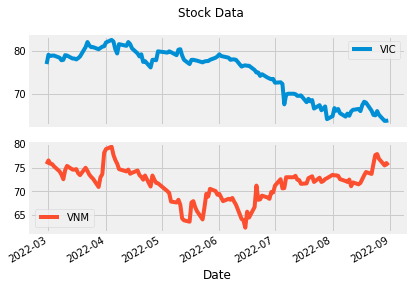

In [13]:
# change data type 
stock_data = stocks_data.loc[:,['VIC','VNM']].astype('float64')

# visualize the data
stock_data.plot(title='Stock Data', subplots=True);

# summarize the data
stock_data.describe()

c. The inputs for Sharpe ratio, part 1: Excess returns

The Sharpe Ratio uses the difference in returns between the two investment opportunities under consideration. However, our data show the historical value of each investment, not the return. To calculate the return, we need to calculate the percentage change in value from one day to the next. 

Next, we need to calculate the relative performance of stocks vs. the government bond. This is calculated as the difference in returns between stock_returns and sp_returns for each day. Since the bond rate is annual, it will be divided by the number of trading days (5 days, 52 weeks, minus a few holidays): 252 days.

In [21]:
# calculate daily stock_data returns
stock_returns = stock_data.pct_change()

# calculate the difference in daily returns
excess_returns = stock_returns - (0.036/252)

d. The inputs for Sharpe ratio, part 2: Average of excess returns

Now this part will demonstrate the average of the excess_returns. This tells us how much more or less the investment yields per day compared to the benchmark.

In [ ]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
avg_excess_return.plot.bar(title='Mean of the Return Difference');

e. The inputs for Sharpe ratio, part 3: Standard deviation of the returns difference

Next, this part calculate the standard deviation of the excess_returns. This shows the amount of risk an investment in the stocks implies as compared to an investment in the Vietnam government bond.

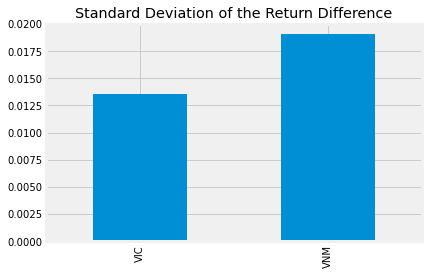

In [17]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
sd_excess_return.plot.bar(title='Standard Deviation of the Returns Difference');

f. Performance valuation

Now we just need to compute the ratio of avg_excess_returns and sd_excess_returns. The result is now finally the Sharpe ratio and indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk.

The Sharpe Ratio is often annualized by multiplying it by the square root of the number of periods. We have used daily data as input, so we'll use the square root of the number of trading days.

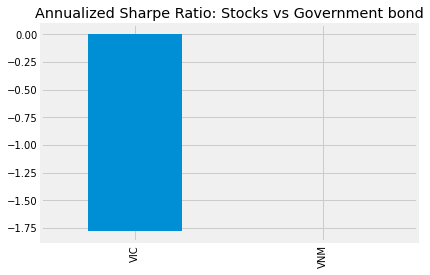

In [20]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio 
annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: Stocks vs Government bond');

g. Conclusion

Given the two Sharpe ratios, which investment should we go for? Clearly that’s Vinamilk.

If you invest in these two stocks, the return of VIC will yield negative cashflow which seems even worse than buying the 1-year Vietnam government bond in terms of interest value, while VNM will remain the same (around 0% return) but that is still considered a loss, given the time value of money! On the risk side, choosing VNM over VIC (as measured by the standard deviation) will add around 0.5% volatility to your portfolio